2.6886584013881163


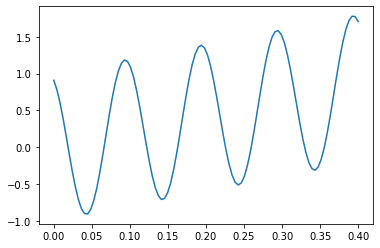

In [21]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,0.4,100)
y = np.sin(2*np.pi*10*t+2) + 2*t
plt.plot(t,y)
print(np.ptp(y))

Not good drift really screws us up lets try a simple fix chop up the thing in segments and average those. We have 4 oscillatons lets take 3 segments

In [33]:
t = np.linspace(0,0.4,100)
y = np.sin(2*np.pi*10*t + 2) + 2*t
ys = np.array_split(y,3)
print(ys)
print([np.ptp(seg) for seg in ys])
    

# Much better

[array([ 0.90929743,  0.78371963,  0.60842137,  0.39515773,  0.15811744,
       -0.08698657, -0.32392452, -0.53699006, -0.71200714, -0.8372387 ,
       -0.90413908, -0.90790179, -0.84776763, -0.72707335, -0.55303778,
       -0.33629903, -0.09023263,  0.16990593,  0.42795909,  0.66790298,
        0.87487456,  1.03612443,  1.14183405,  1.18574516,  1.16556094,
        1.08309326,  0.9441465 ,  0.75814553,  0.53753147,  0.29696428,
        0.05238293, -0.18001628, -0.38481796, -0.54837578]), array([-0.65968726, -0.71109905, -0.69879751, -0.62305321, -0.48820356,
       -0.30237475, -0.07696091,  0.17410635,  0.43525098,  0.69025093,
        0.92327803,  1.11991264,  1.26806799,  1.35876491,  1.38670752,
        1.3506226 ,  1.25334131,  1.10161763,  0.90569543,  0.67865185,
        0.43555896,  0.19251765, -0.03437449, -0.2300551 , -0.38146253,
       -0.47837318, -0.51405682, -0.48570803, -0.39462605, -0.24613147,
       -0.04922517,  0.18398864,  0.43907835]), array([ 7.00210054e-01,  9

Much better! Phase also does not matter a lot

In [45]:
def ptp(signal, duration, freq):
    oscillations = duration*freq
    splits = int(np.floor(oscillations)) if oscillations > 1 else 1
    return np.mean([np.ptp(seg) for seg in np.array_split(signal,splits)])
freq = 25
duration = 1.1
t = np.linspace(0,duration,10000)
y = np.sin(2*np.pi*freq*t + 2) + 2*t
print(ptp(y,duration,freq))


27
2.0365558480985007
